In [58]:
#importando las librerias y dependencias
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics



In [59]:
gold_data=pd.read_csv(r"C:\Users\USUARIO\Desktop\Datos\gld_price_data.csv")

In [60]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [61]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [62]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [63]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [64]:
correlation=gold_data.corr()

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_16436\361041759.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=gold_data.corr()


<AxesSubplot: >

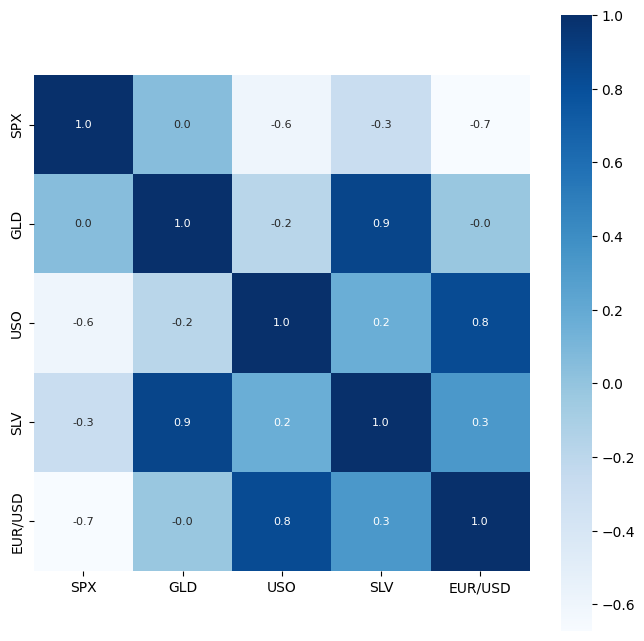

In [65]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation,annot=True,cbar=True,square=True, fmt='.1f',annot_kws={"size":8},cmap="Blues")

# 1.f es un punto flotante

In [66]:
# correlacion de valores de GLF 
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


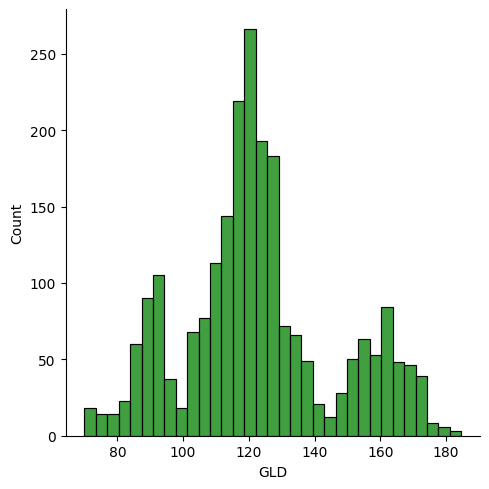

In [67]:
#chqueando la dsitribucion del precio del Oro 
sns.displot(gold_data['GLD'],color='green')

In [68]:
X=gold_data.drop(columns=['GLD','Date'])
Y=gold_data['GLD']

In [69]:
X

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [70]:
Y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

In [71]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2, random_state=2)


In [72]:
#Entrenamiento del modelo 
#Random Forest Regressor
regressor=RandomForestRegressor(n_estimators=100)



In [73]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [74]:
#Evaluacion del modelo 
test_data_prediction =regressor.predict(X_test)
r2=metrics.r2_score(test_data_prediction,Y_test)
r2

0.9894573999641353

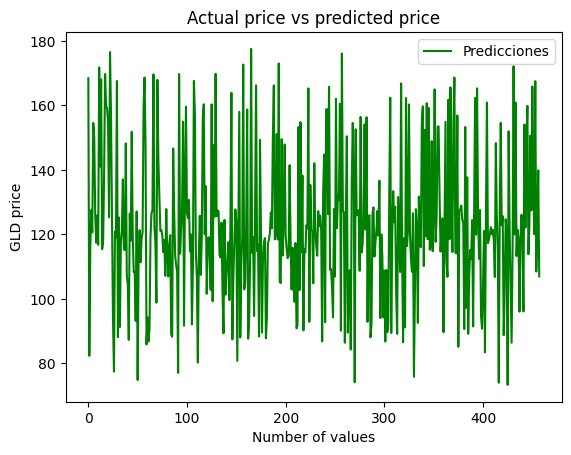

In [75]:
plt.plot(test_data_prediction , color='green', label='Predicciones')
plt.title("Actual price vs predicted price")
plt.xlabel("Number of values")
plt.ylabel("GLD price")
plt.legend()
plt.show()

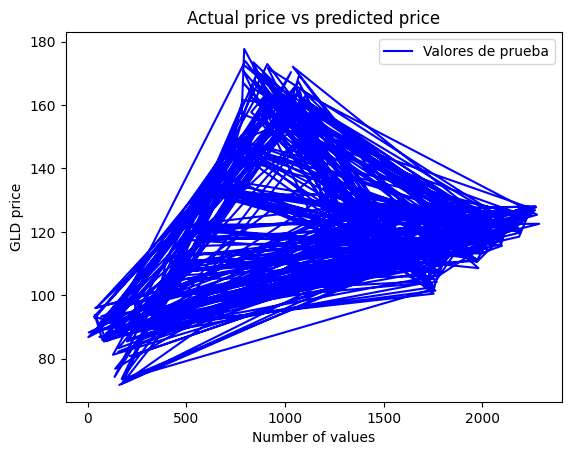

In [76]:
plt.plot(Y_test ,color='blue',label='Valores de prueba')
# plt.plot(test_data_prediction , color='green', label='Predicciones')
plt.title("Actual price vs predicted price")
plt.xlabel("Number of values")
plt.ylabel("GLD price")
plt.legend()
plt.show()

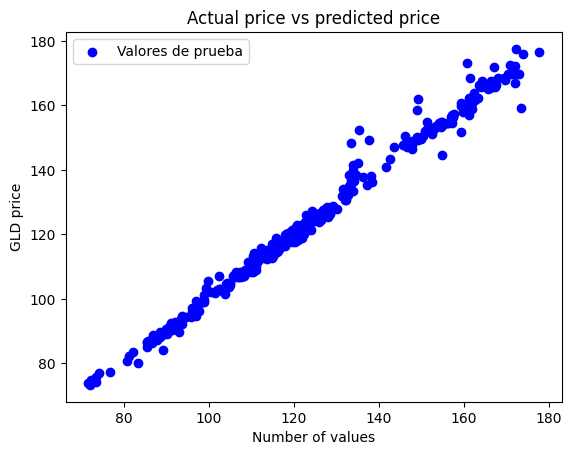

In [83]:
plt.scatter(Y_test,test_data_prediction ,color='blue',label='Valores de prueba')

plt.title("Actual price vs predicted price")
plt.xlabel("Number of values")
plt.ylabel("GLD price")
plt.legend()
plt.show()

In [78]:
Y_test

903     168.020004
129      81.230003
1787    112.320000
1913    127.589996
2048    119.620003
           ...    
923     166.380005
1693    106.379997
2054    122.239998
658     133.830002
376     102.360001
Name: GLD, Length: 458, dtype: float64